# Final Report: Similarity between New York and Toronto

Neel Panchwagh

## Introduction / Business Problem

A small businesses owner has one store in Downtown Toronto. He wants to open a second store in the Toronto area, but wants to know where the ideal location for his store is. Where can he get the most traffic to his store? What location will attract the similar customer base? What location of the Toronto area is the most similar to the location of his current store? Neighboorhood clustering can help solve this problem and shed light to where this business owner should open his next store. Now, lets say he wants to expland his customer base and business footprint and open a new location in a different city, New York City. There are hundreds of locations to choose, from Battery Park to Midtown Manhattan, to DUMBO and Flushing. What neighborhood in NYC is most similar to his current neighborhood in Toronto? Should he open a store in Toronto or open a store in NYC? Clustering similar neighborhoods between the two cities can give the business owner a solution. 

## Data Section

The data for this report comes from different sources. The first data source is to obtain neighborhood preliminary information for NYC boroughs. This data source comes with information about each of the five NYC boroughs, neighborhoods within each borough, and the location within NYC for each neighborhood. The second data source is similar to the first data source, except it contains Toronto information. The second data source contains postal codes for different areas in Toronto. Each postal code is associated with borough and a group of nearby neighborhoods. For example, the postal code M5A in Toronto is located in the borough of Downtown Toronto, containing two neighborhoods: Regent Park and Harbourfront. The third data source comes from Foursquare location services. Foursquare provides the necessay venue information for places in both Toronto and NYC. Each venue comes with information about its name, geographic coordinates, venue type and category, and neighborhood location. This allows us to place each venue in a specific neighborhood in either the NYC or Toronto area, which allows for further analysis and machine learning. 

## Code:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!conda install -c conda-forge folium=0.5.0 --yes
import folium

import json 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans, DBSCAN




Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

#### Create Tables

In [4]:
df_Toronto = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df_Toronto = df_Toronto[0]
df_Toronto.rename(columns = {'Neighbourhood' : 'Neighborhood'}, inplace = True)
for i in range(df_Toronto.count()[0]):
    if df_Toronto['Borough'][i] == 'Not assigned':
        df_Toronto.drop(axis = 0, index = i, inplace = True)
df_Toronto.reset_index(inplace = True, drop = True)
for f in range(df_Toronto.count()[0]):
    if df_Toronto['Neighborhood'][f] == 'Not assigned':
        df_Toronto['Neighborhood'][f] = df_Toronto['Borough'][f]
df_Toronto.sort_values(by = ['Postal Code'], inplace = True)
df_Toronto.reset_index(inplace = True, drop = True)
df_Toronto.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [5]:
ll = pd.read_csv('http://cocl.us/Geospatial_data')
lat = []
long = []

for i in range(ll.shape[0]):
    la = ll['Latitude'][i]
    lo = ll['Longitude'][i]
    lat.append(la)
    long.append(lo)
df_Toronto['Latitude'] = lat
df_Toronto['Longitude'] = long

df_Toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [6]:
df_Toronto

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [7]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

In [8]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [9]:
neighborhoods_data = newyork_data['features']

column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
df_NYC = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    df_NYC = df_NYC.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

df_NYC.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
df_NYC

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


#### Visualize Neighborhoods

In [11]:
address = 'Toronto, '

geolocator = Nominatim(user_agent = 'foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.5)


for lat, lng, label in zip(df_Toronto['Latitude'], df_Toronto['Longitude'], df_Toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(df_NYC['Latitude'], df_NYC['Longitude'], df_NYC['Borough'], df_NYC['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### Get Venue Data

In [29]:
# The code was removed by Watson Studio for sharing.

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, limit = 100):
    noresults = []
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
       
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
toronto_venues = getNearbyVenues(names=df_Toronto['Neighborhood'],
                                   latitudes=df_Toronto['Latitude'],
                                   longitudes=df_Toronto['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [32]:
nyc_venues = getNearbyVenues(names=df_NYC['Neighborhood'],
                                   latitudes=df_NYC['Latitude'],
                                   longitudes=df_NYC['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [33]:
dummy = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")


dummy['Neighborhood'] = toronto_venues['Neighborhood'] 

first_col = dummy.pop('Neighborhood')
dummy.insert(0, 'Neighborhood', first_col)
tor_freq = dummy.groupby('Neighborhood').mean().reset_index()
tor_freq.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
dummy = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")


dummy['Neighborhood'] = nyc_venues['Neighborhood'] 

first_col = dummy.pop('Neighborhood')
dummy.insert(0, 'Neighborhood', first_col)
nyc_freq = dummy.groupby('Neighborhood').mean().reset_index()
nyc_freq

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Allerton,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Annadale,0.000000,0.0,0.000000,0.00,0.125000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Arden Heights,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Arlington,0.000000,0.0,0.000000,0.00,0.200000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Arrochar,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Arverne,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000
6,Astoria,0.000000,0.0,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000
7,Astoria Heights,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Auburndale,0.000000,0.0,0.000000,0.00,0.047619,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Bath Beach,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000


In [96]:
nyc_freq.drop(96, inplace = True)

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
tor_top_ven = pd.DataFrame(columns=columns)
tor_top_ven['Neighborhood'] = tor_freq['Neighborhood']

for ind in np.arange(tor_freq.shape[0]):
    tor_top_ven.iloc[ind, 1:] = return_most_common_venues(tor_freq.iloc[ind, :], num_top_venues)

tor_top_ven

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Clothing Store,Breakfast Spot,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
1,"Alderwood, Long Branch",Pizza Place,Gym,Coffee Shop,Sandwich Place,Pub,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Park,Fried Chicken Joint,Sandwich Place,Bridal Shop,Diner,Restaurant,Deli / Bodega,Ice Cream Shop
3,Bayview Village,Café,Bank,Japanese Restaurant,Chinese Restaurant,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Restaurant,Thai Restaurant,Locksmith,Juice Bar,Butcher,Indian Restaurant,Café
5,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Café,Restaurant,Farmers Market,Beer Bar,Seafood Restaurant,Italian Restaurant
6,"Birch Cliff, Cliffside West",Café,College Stadium,Skating Rink,General Entertainment,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
7,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Yoga Studio,Bakery,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store
8,"Business reply mail Processing Centre, South C...",Light Rail Station,Garden Center,Smoke Shop,Brewery,Farmers Market,Fast Food Restaurant,Spa,Burrito Place,Restaurant,Auto Workshop
9,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Terminal,Harbor / Marina,Bar,Coffee Shop,Plane,Rental Car Location,Sculpture Garden,Boutique,Boat or Ferry


In [132]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nyc_top_ven = pd.DataFrame(columns=columns)
nyc_top_ven['Neighborhood'] = nyc_freq['Neighborhood']

for ind in np.arange(tor_freq.shape[0]):
    nyc_top_ven.iloc[ind, 1:] = return_most_common_venues(nyc_freq.iloc[ind, :], num_top_venues)

nyc_top_ven.dropna(axis = 0, inplace = True)
nyc_top_ven

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Deli / Bodega,Chinese Restaurant,Discount Store,Supermarket,Gas Station,Breakfast Spot,Spanish Restaurant,Spa,Fast Food Restaurant
1,Annadale,Pharmacy,Food,Train Station,American Restaurant,Restaurant,Pizza Place,Liquor Store,Diner,Fast Food Restaurant,Farmers Market
2,Arden Heights,Lawyer,Pharmacy,Deli / Bodega,Coffee Shop,Bus Stop,Pizza Place,Exhibit,Eye Doctor,Factory,Falafel Restaurant
3,Arlington,Deli / Bodega,Coffee Shop,American Restaurant,Bus Stop,Boat or Ferry,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
4,Arrochar,Pizza Place,Bus Stop,Italian Restaurant,Deli / Bodega,Sandwich Place,Bagel Shop,Athletics & Sports,Middle Eastern Restaurant,Food Truck,Hotel
5,Arverne,Surf Spot,Sandwich Place,Metro Station,Café,Board Shop,Beach,Pizza Place,Restaurant,Donut Shop,Coffee Shop
6,Astoria,Bar,Middle Eastern Restaurant,Greek Restaurant,Indian Restaurant,Hookah Bar,Seafood Restaurant,Mediterranean Restaurant,Café,Bakery,Gourmet Shop
7,Astoria Heights,Italian Restaurant,Plaza,Bus Station,Supermarket,Bowling Alley,Motel,Chinese Restaurant,Bakery,Hostel,Pizza Place
8,Auburndale,Italian Restaurant,Comic Shop,Athletics & Sports,Gymnastics Gym,Fast Food Restaurant,Pet Store,Pharmacy,Toy / Game Store,Miscellaneous Shop,Mobile Phone Shop
9,Bath Beach,Pizza Place,Bubble Tea Shop,Donut Shop,Chinese Restaurant,Gas Station,Italian Restaurant,Pharmacy,Sushi Restaurant,Fast Food Restaurant,Cantonese Restaurant


#### Clustering withing Toronto

In [42]:
tor_freq_cluster = tor_freq.drop('Neighborhood', 1)

In [43]:
from sklearn.metrics import silhouette_score
import seaborn as sns

In [44]:
def bestn(X):
    scores = []
    for i in range(2, 21):
        k = KMeans(n_clusters = i, init = 'k-means++')
        k.fit(X)
        s = silhouette_score(X, k.labels_)
        scores.append(s)
        bestk = scores.index(max(scores))
    
    ax = sns.lineplot(x = list(range(2,21)), y = scores)
    return bestk

0

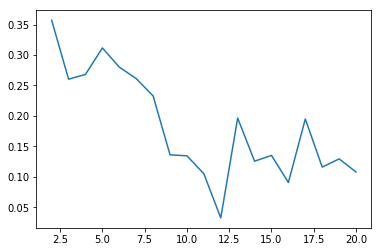

In [45]:
bestn(tor_freq_cluster)

In [46]:
KM_tor = KMeans(n_clusters = 10, init = 'k-means++')

In [47]:
KM_tor.fit(tor_freq_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
KM_tor.labels_[0:5]

array([5, 5, 5, 5, 5], dtype=int32)

In [49]:
tor_silscore_kmeans = silhouette_score(tor_freq_cluster, KM_tor.labels_)
tor_silscore_kmeans

0.19259471447275237

In [50]:
SCAN_tor = DBSCAN()

In [51]:
SCAN_tor.fit(tor_freq_cluster)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [52]:
SCAN_tor.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1])

In [53]:
tor_silscore_scan = silhouette_score(tor_freq_cluster, SCAN_tor.labels_)
tor_silscore_scan

0.32904458186238406

In [54]:
print('Is DBSCAN better, greater silhouette score, than K-Means clustering?', tor_silscore_scan > tor_silscore_kmeans, sep = '\n')

Is DBSCAN better, greater silhouette score, than K-Means clustering?
True


In [55]:
tor_top_ven.insert(0, 'Cluster Labels', KM_tor.labels_)

tor_labels = df_Toronto
tor_labels = tor_labels.join(tor_top_ven.set_index('Neighborhood'), on='Neighborhood')

tor_labels.sort_values(by = 'Neighborhood').head() 

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,M1S,Scarborough,Agincourt,43.794200,-79.262029,5.0,Lounge,Latin American Restaurant,Clothing Store,Breakfast Spot,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
89,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,5.0,Pizza Place,Gym,Coffee Shop,Sandwich Place,Pub,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
28,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,5.0,Coffee Shop,Bank,Park,Fried Chicken Joint,Sandwich Place,Bridal Shop,Diner,Restaurant,Deli / Bodega,Ice Cream Shop
19,M2K,North York,Bayview Village,43.786947,-79.385975,5.0,Café,Bank,Japanese Restaurant,Chinese Restaurant,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
62,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,5.0,Coffee Shop,Sandwich Place,Italian Restaurant,Restaurant,Thai Restaurant,Locksmith,Juice Bar,Butcher,Indian Restaurant,Café


In [56]:
tor_labels.dropna(axis = 0, inplace = True)
tor_labels

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,2.0,Fast Food Restaurant,Print Shop,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Department Store
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,5.0,Home Service,Moving Target,Bar,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,5.0,Electronics Store,Medical Center,Intersection,Bank,Mexican Restaurant,Restaurant,Rental Car Location,Breakfast Spot,Donut Shop,Doner Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,5.0,Coffee Shop,Korean Restaurant,Mexican Restaurant,Yoga Studio,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,5.0,Bakery,Bank,Hakka Restaurant,Fried Chicken Joint,Athletics & Sports,Caribbean Restaurant,Gas Station,Thai Restaurant,Distribution Center,Diner
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,1.0,Playground,Yoga Studio,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,5.0,Discount Store,Department Store,Chinese Restaurant,Coffee Shop,Hobby Shop,Convenience Store,Dim Sum Restaurant,Diner,Distribution Center,Dog Run
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,0.0,Bakery,Bus Line,Soccer Field,Park,Metro Station,Bus Station,Intersection,Ice Cream Shop,Cosmetics Shop,Construction & Landscaping
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,9.0,American Restaurant,Motel,Department Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,5.0,Café,College Stadium,Skating Rink,General Entertainment,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run


In [59]:
address = 'Toronto, '

geolocator = Nominatim(user_agent = 'foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

tor_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.5)

kclusters = 10

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(tor_labels['Latitude'], tor_labels['Longitude'], tor_labels['Neighborhood'], tor_labels['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-3],
        fill=True,
        fill_color=rainbow[int(cluster)-3],
        fill_opacity=0.7).add_to(tor_map_clusters)
       
tor_map_clusters

#### Clustering withing NYC

In [97]:
nyc_freq_cluster = nyc_freq.drop('Neighborhood', 1)

0

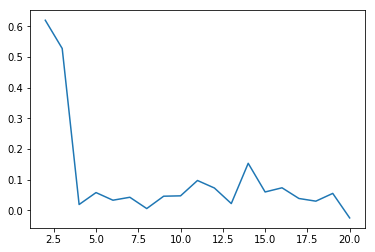

In [98]:
bestn(nyc_freq_cluster)

In [123]:
KM_nyc = KMeans(n_clusters = 10, init = 'k-means++')

In [124]:
KM_nyc.fit(nyc_freq_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [125]:
KM_nyc.labels_

array([8, 8, 8, 1, 8, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 3, 8, 1, 8, 1, 1, 8,
       8, 1, 7, 1, 1, 1, 8, 9, 1, 1, 8, 1, 8, 1, 2, 8, 8, 1, 6, 1, 5, 1,
       1, 8, 8, 1, 1, 1, 1, 1, 1, 1, 0, 0, 8, 1, 1, 0, 1, 8, 1, 8, 8, 1,
       1, 1, 8, 8, 1, 8, 8, 1, 1, 0, 1, 1, 1, 8, 8, 1, 1, 0, 0, 1, 1, 1,
       8, 1, 8, 1, 1, 8, 4, 1], dtype=int32)

In [126]:
nyc_silscore_kmeans = silhouette_score(nyc_freq_cluster, KM_nyc.labels_)
nyc_silscore_kmeans

0.04536458507790875

In [127]:
SCAN_nyc = DBSCAN()

In [128]:
SCAN_nyc.fit(nyc_freq_cluster)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [129]:
SCAN_nyc.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0])

In [130]:
nyc_silscore_scan = silhouette_score(nyc_freq_cluster, SCAN_nyc.labels_)
nyc_silscore_scan

0.47663580033729414

In [133]:
nyc_top_ven.insert(0, 'Cluster Labels', KM_nyc.labels_)

nyc_labels = df_NYC
nyc_labels = nyc_labels.join(nyc_top_ven.set_index('Neighborhood'), on='Neighborhood')

nyc_labels.sort_values(by = 'Neighborhood').head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
298,Bronx,Allerton,40.865788,-73.859319,8.0,Pizza Place,Deli / Bodega,Chinese Restaurant,Discount Store,Supermarket,Gas Station,Breakfast Spot,Spanish Restaurant,Spa,Fast Food Restaurant
215,Staten Island,Annadale,40.538114,-74.178549,8.0,Pharmacy,Food,Train Station,American Restaurant,Restaurant,Pizza Place,Liquor Store,Diner,Fast Food Restaurant,Farmers Market
241,Staten Island,Arden Heights,40.549286,-74.185887,8.0,Lawyer,Pharmacy,Deli / Bodega,Coffee Shop,Bus Stop,Pizza Place,Exhibit,Eye Doctor,Factory,Falafel Restaurant
227,Staten Island,Arlington,40.635325,-74.165104,1.0,Deli / Bodega,Coffee Shop,American Restaurant,Bus Stop,Boat or Ferry,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
228,Staten Island,Arrochar,40.596313,-74.067124,8.0,Pizza Place,Bus Stop,Italian Restaurant,Deli / Bodega,Sandwich Place,Bagel Shop,Athletics & Sports,Middle Eastern Restaurant,Food Truck,Hotel


In [134]:
nyc_labels.dropna(axis = 0, inplace = True)
nyc_labels

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bronx,Co-op City,40.874294,-73.829939,0.0,Bus Station,Deli / Bodega,Pizza Place,Basketball Court,Baseball Field,Fried Chicken Joint,Bagel Shop,Trail,Pharmacy,Grocery Store
2,Bronx,Eastchester,40.887556,-73.827806,0.0,Caribbean Restaurant,Deli / Bodega,Bus Station,Diner,Bowling Alley,Seafood Restaurant,Food & Drink Shop,Platform,Donut Shop,Convenience Store
3,Bronx,Fieldston,40.895437,-73.905643,4.0,Music Venue,River,Bus Station,Plaza,Yoga Studio,Fish & Chips Shop,Exhibit,Eye Doctor,Factory,Falafel Restaurant
10,Bronx,Baychester,40.866858,-73.835798,1.0,Donut Shop,Fried Chicken Joint,Pizza Place,Shopping Mall,Men's Store,Mexican Restaurant,Baseball Field,Bank,Electronics Store,Pet Store
12,Bronx,City Island,40.847247,-73.786488,1.0,Seafood Restaurant,Thrift / Vintage Store,French Restaurant,Deli / Bodega,Harbor / Marina,Spanish Restaurant,Baseball Field,Bar,Bank,Boat or Ferry
13,Bronx,Bedford Park,40.870185,-73.885512,8.0,Mexican Restaurant,Diner,Chinese Restaurant,Pizza Place,Deli / Bodega,Sandwich Place,Train Station,Smoke Shop,Gym,Donut Shop
17,Bronx,East Tremont,40.842696,-73.887356,8.0,Pizza Place,Fast Food Restaurant,Shoe Store,Café,Bank,Paella Restaurant,Lounge,Mobile Phone Shop,Donut Shop,Eye Doctor
27,Bronx,Clason Point,40.806551,-73.854144,0.0,Park,Bus Stop,Convenience Store,Grocery Store,Pool,Boat or Ferry,South American Restaurant,Yoga Studio,Financial or Legal Service,Factory
29,Bronx,Country Club,40.844246,-73.824099,1.0,Playground,Sandwich Place,Chinese Restaurant,Athletics & Sports,Event Space,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market
34,Bronx,Belmont,40.857277,-73.888452,8.0,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Grocery Store,Bank,Dessert Shop,Donut Shop,Mexican Restaurant,Café


In [136]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

nyc_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

kclusters = 5

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(nyc_labels['Latitude'], nyc_labels['Longitude'], nyc_labels['Neighborhood'], nyc_labels['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-5],
        fill=True,
        fill_color=rainbow[int(cluster)-5],
        fill_opacity=0.7).add_to(nyc_map_clusters)

nyc_map_clusters

#### Group table by clusters to see average frequency within each cluster

In [137]:
nyc_labels.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bronx,Co-op City,40.874294,-73.829939,0.0,Bus Station,Deli / Bodega,Pizza Place,Basketball Court,Baseball Field,Fried Chicken Joint,Bagel Shop,Trail,Pharmacy,Grocery Store
2,Bronx,Eastchester,40.887556,-73.827806,0.0,Caribbean Restaurant,Deli / Bodega,Bus Station,Diner,Bowling Alley,Seafood Restaurant,Food & Drink Shop,Platform,Donut Shop,Convenience Store
3,Bronx,Fieldston,40.895437,-73.905643,4.0,Music Venue,River,Bus Station,Plaza,Yoga Studio,Fish & Chips Shop,Exhibit,Eye Doctor,Factory,Falafel Restaurant
10,Bronx,Baychester,40.866858,-73.835798,1.0,Donut Shop,Fried Chicken Joint,Pizza Place,Shopping Mall,Men's Store,Mexican Restaurant,Baseball Field,Bank,Electronics Store,Pet Store
12,Bronx,City Island,40.847247,-73.786488,1.0,Seafood Restaurant,Thrift / Vintage Store,French Restaurant,Deli / Bodega,Harbor / Marina,Spanish Restaurant,Baseball Field,Bar,Bank,Boat or Ferry


In [138]:
tor_labels.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,2.0,Fast Food Restaurant,Print Shop,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Department Store
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,5.0,Home Service,Moving Target,Bar,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,5.0,Electronics Store,Medical Center,Intersection,Bank,Mexican Restaurant,Restaurant,Rental Car Location,Breakfast Spot,Donut Shop,Doner Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,5.0,Coffee Shop,Korean Restaurant,Mexican Restaurant,Yoga Studio,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,5.0,Bakery,Bank,Hakka Restaurant,Fried Chicken Joint,Athletics & Sports,Caribbean Restaurant,Gas Station,Thai Restaurant,Distribution Center,Diner


In [139]:
nyc_freq.insert(0, 'Cluster Labels', KM_nyc.labels_)

nyc_clusters = df_NYC
nyc_clusters = nyc_clusters.join(nyc_freq.set_index('Neighborhood'), on='Neighborhood')

In [140]:
nyc_clusters.dropna(axis = 0, inplace = True)
nyc_clusters.reset_index(drop = True)
nyc_clusters.shape

(98, 431)

In [141]:
tor_freq.insert(0, 'Cluster Labels', KM_tor.labels_)

tor_clusters = df_Toronto
tor_clusters = tor_clusters.join(tor_freq.set_index('Neighborhood'), on='Neighborhood')
tor_clusters.dropna(axis = 0, inplace = True)
tor_clusters.reset_index(drop = True)
tor_clusters.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
tor_clusters

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,2.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,5.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,5.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,M1G,Scarborough,Woburn,43.770992,-79.216917,5.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,5.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,1.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,5.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,9.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,5.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [143]:
nyc_clusters = nyc_clusters.groupby('Cluster Labels', as_index = False).mean()

In [144]:
nyc_clusters

,Cluster Labels,Latitude,Longitude,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,40.817268,-73.880081,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,40.691691,-73.949072,0.00076,0.0,0.0,0.00119,0.018261,0.000839,0.00085,...,0.0,0.0,0.000184,0.00076,0.0,0.003508,0.009320,0.000357,0.003174,0.005749
2,2.0,40.660003,-73.751753,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.0,40.611322,-73.765968,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.0,40.895437,-73.905643,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,5.0,40.635564,-73.902093,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,6.0,40.506082,-74.229504,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,7.0,40.615150,-73.898556,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,8.0,40.704256,-73.945802,0.00000,0.0,0.0,0.00000,0.011750,0.000000,0.00000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.001916,0.001063,0.001907,0.000000
9,9.0,40.557401,-73.925512,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [145]:
tor_clusters = tor_clusters.groupby('Cluster Labels', as_index = False).mean()

In [146]:
tor_clusters

,Cluster Labels,Latitude,Longitude,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0.0,43.725339,-79.421980,0.000000,0.000000,0.020513,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.010989,0.012821,0.000000,0.000000,0.00000,0.000000,0.000000
1,1.0,43.744734,-79.239476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,2.0,43.806686,-79.194353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,3.0,43.751140,-79.433798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,4.0,43.711695,-79.416936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,5.0,43.695251,-79.390972,0.001299,0.000188,0.000893,0.000893,0.000893,0.001786,0.000893,...,0.000429,0.00433,0.000781,0.000000,0.006433,0.000752,0.001989,0.00102,0.000604,0.005362
6,6.0,43.710364,-79.396004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.035714,0.000000
7,7.0,43.756303,-79.565963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,8.0,43.680512,-79.515376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,9.0,43.716316,-79.239476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [147]:
tor_clusters['Cluster Labels'] = tor_clusters['Cluster Labels'] + 10

In [148]:
tor_clusters

,Cluster Labels,Latitude,Longitude,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,10.0,43.725339,-79.421980,0.000000,0.000000,0.020513,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.010989,0.012821,0.000000,0.000000,0.00000,0.000000,0.000000
1,11.0,43.744734,-79.239476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,12.0,43.806686,-79.194353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,13.0,43.751140,-79.433798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,14.0,43.711695,-79.416936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,15.0,43.695251,-79.390972,0.001299,0.000188,0.000893,0.000893,0.000893,0.001786,0.000893,...,0.000429,0.00433,0.000781,0.000000,0.006433,0.000752,0.001989,0.00102,0.000604,0.005362
6,16.0,43.710364,-79.396004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.035714,0.000000
7,17.0,43.756303,-79.565963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,18.0,43.680512,-79.515376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,19.0,43.716316,-79.239476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


#### Create combined table

In [149]:
cluster = pd.concat([nyc_clusters, tor_clusters])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [150]:
cluster

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000760,0.0,0.000000,0.00119,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000184,0.00076,0.0,0.003508,0.009320,0.000357,0.003174,0.005749
2,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.001916,0.001063,0.001907,0.000000
9,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [151]:
first_col = cluster.pop('Cluster Labels')
second_col = cluster.pop('Latitude')
third_col = cluster.pop('Longitude')

In [152]:
cluster.insert(0, 'Longitude', third_col)
cluster.insert(0, 'Latitude', second_col)
cluster.insert(0, 'Cluster Labels', first_col)

In [153]:
cluster

,Cluster Labels,Latitude,Longitude,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,40.817268,-73.880081,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,40.691691,-73.949072,0.000760,0.0,0.000000,0.00119,NaN,NaN,NaN,...,0.000000,0.0,0.000184,0.00076,0.0,0.003508,0.009320,0.000357,0.003174,0.005749
2,2.0,40.660003,-73.751753,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.0,40.611322,-73.765968,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.0,40.895437,-73.905643,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,5.0,40.635564,-73.902093,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,6.0,40.506082,-74.229504,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,7.0,40.615150,-73.898556,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,8.0,40.704256,-73.945802,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.001916,0.001063,0.001907,0.000000
9,9.0,40.557401,-73.925512,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


#### Preprocessing of data table

In [154]:
cluster_ML = cluster.drop('Cluster Labels', 1)
cluster_ML = cluster_ML.drop('Latitude', 1)
cluster_ML = cluster_ML.drop('Longitude', 1)

In [155]:
cluster_ML

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000760,0.0,0.000000,0.00119,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000184,0.00076,0.0,0.003508,0.009320,0.000357,0.003174,0.005749
2,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.001916,0.001063,0.001907,0.000000
9,0.000000,0.0,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [156]:
cluster_ML.fillna(0, inplace = True)
cluster_ML

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000760,0.0,0.000000,0.00119,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000184,0.00076,0.0,0.003508,0.009320,0.000357,0.003174,0.005749
2,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.001916,0.001063,0.001907,0.000000
9,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


#### Run Cluster ML algorithm on combined table

In [157]:
KM_combo = KMeans(n_clusters = 5, init = 'k-means++')

In [158]:
KM_combo.fit(cluster_ML)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [159]:
KM_combo.labels_

array([3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 4, 3, 1, 3, 3, 3],
      dtype=int32)

In [160]:
combo_KM_score = silhouette_score(cluster_ML, KM_combo.labels_)
combo_KM_score

0.29731250559476957

In [161]:
SCAN_combo = DBSCAN()

In [162]:
SCAN_combo.fit(cluster_ML)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [163]:
SCAN_combo.labels_

array([ 0,  0, -1, -1,  0,  0, -1, -1,  0, -1,  0, -1, -1, -1, -1,  0,  0,
       -1, -1, -1])

#### Insert Overall Cluster number into original table

In [165]:
nyc_clusters.insert(1, 'Overall Cluster', KM_combo.labels_[0:10])

In [166]:
nyc_clusters

,Cluster Labels,Overall Cluster,Latitude,Longitude,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,3,40.817268,-73.880081,0.00000,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,3,40.691691,-73.949072,0.00076,0.0,0.0,0.00119,0.018261,0.000839,...,0.0,0.0,0.000184,0.00076,0.0,0.003508,0.009320,0.000357,0.003174,0.005749
2,2.0,0,40.660003,-73.751753,0.00000,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.0,2,40.611322,-73.765968,0.00000,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.0,3,40.895437,-73.905643,0.00000,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,5.0,3,40.635564,-73.902093,0.00000,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,6.0,3,40.506082,-74.229504,0.00000,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,7.0,3,40.615150,-73.898556,0.00000,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,8.0,3,40.704256,-73.945802,0.00000,0.0,0.0,0.00000,0.011750,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.001916,0.001063,0.001907,0.000000
9,9.0,3,40.557401,-73.925512,0.00000,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [167]:
tor_clusters.insert(1, 'Overall Cluster', KM_combo.labels_[10:])

In [168]:
tor_clusters['Cluster Labels'] -= 10

In [169]:
tor_clusters

,Cluster Labels,Overall Cluster,Latitude,Longitude,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0.0,3,43.725339,-79.421980,0.000000,0.000000,0.020513,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.010989,0.012821,0.000000,0.000000,0.00000,0.000000,0.000000
1,1.0,2,43.744734,-79.239476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,2.0,3,43.806686,-79.194353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,3.0,1,43.751140,-79.433798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,4.0,4,43.711695,-79.416936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,5.0,3,43.695251,-79.390972,0.001299,0.000188,0.000893,0.000893,0.000893,0.001786,...,0.000429,0.00433,0.000781,0.000000,0.006433,0.000752,0.001989,0.00102,0.000604,0.005362
6,6.0,1,43.710364,-79.396004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.035714,0.000000
7,7.0,3,43.756303,-79.565963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,8.0,3,43.680512,-79.515376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,9.0,3,43.716316,-79.239476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [170]:
nyc_labels.insert(5, 'Overall Cluster', 0)
nyc_labels.reset_index(drop = True, inplace = True)

In [171]:
for i in range(nyc_labels.shape[0]):
    cl = int(nyc_labels['Cluster Labels'][i])
    ocl = nyc_clusters['Overall Cluster'][cl]
    nyc_labels['Overall Cluster'][i] = ocl

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [172]:
nyc_labels

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Overall Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Co-op City,40.874294,-73.829939,0.0,3,Bus Station,Deli / Bodega,Pizza Place,Basketball Court,Baseball Field,Fried Chicken Joint,Bagel Shop,Trail,Pharmacy,Grocery Store
1,Bronx,Eastchester,40.887556,-73.827806,0.0,3,Caribbean Restaurant,Deli / Bodega,Bus Station,Diner,Bowling Alley,Seafood Restaurant,Food & Drink Shop,Platform,Donut Shop,Convenience Store
2,Bronx,Fieldston,40.895437,-73.905643,4.0,3,Music Venue,River,Bus Station,Plaza,Yoga Studio,Fish & Chips Shop,Exhibit,Eye Doctor,Factory,Falafel Restaurant
3,Bronx,Baychester,40.866858,-73.835798,1.0,3,Donut Shop,Fried Chicken Joint,Pizza Place,Shopping Mall,Men's Store,Mexican Restaurant,Baseball Field,Bank,Electronics Store,Pet Store
4,Bronx,City Island,40.847247,-73.786488,1.0,3,Seafood Restaurant,Thrift / Vintage Store,French Restaurant,Deli / Bodega,Harbor / Marina,Spanish Restaurant,Baseball Field,Bar,Bank,Boat or Ferry
5,Bronx,Bedford Park,40.870185,-73.885512,8.0,3,Mexican Restaurant,Diner,Chinese Restaurant,Pizza Place,Deli / Bodega,Sandwich Place,Train Station,Smoke Shop,Gym,Donut Shop
6,Bronx,East Tremont,40.842696,-73.887356,8.0,3,Pizza Place,Fast Food Restaurant,Shoe Store,Café,Bank,Paella Restaurant,Lounge,Mobile Phone Shop,Donut Shop,Eye Doctor
7,Bronx,Clason Point,40.806551,-73.854144,0.0,3,Park,Bus Stop,Convenience Store,Grocery Store,Pool,Boat or Ferry,South American Restaurant,Yoga Studio,Financial or Legal Service,Factory
8,Bronx,Country Club,40.844246,-73.824099,1.0,3,Playground,Sandwich Place,Chinese Restaurant,Athletics & Sports,Event Space,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market
9,Bronx,Belmont,40.857277,-73.888452,8.0,3,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Grocery Store,Bank,Dessert Shop,Donut Shop,Mexican Restaurant,Café


In [173]:
tor_labels.insert(5, 'Overall Cluster', 0)
tor_labels.reset_index(drop = True, inplace = True)

In [174]:
tor_labels

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Overall Cluster,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0,2.0,Fast Food Restaurant,Print Shop,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Department Store
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0,5.0,Home Service,Moving Target,Bar,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,5.0,Electronics Store,Medical Center,Intersection,Bank,Mexican Restaurant,Restaurant,Rental Car Location,Breakfast Spot,Donut Shop,Doner Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0,5.0,Coffee Shop,Korean Restaurant,Mexican Restaurant,Yoga Studio,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0,5.0,Bakery,Bank,Hakka Restaurant,Fried Chicken Joint,Athletics & Sports,Caribbean Restaurant,Gas Station,Thai Restaurant,Distribution Center,Diner
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0,1.0,Playground,Yoga Studio,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,0,5.0,Discount Store,Department Store,Chinese Restaurant,Coffee Shop,Hobby Shop,Convenience Store,Dim Sum Restaurant,Diner,Distribution Center,Dog Run
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,0,0.0,Bakery,Bus Line,Soccer Field,Park,Metro Station,Bus Station,Intersection,Ice Cream Shop,Cosmetics Shop,Construction & Landscaping
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,0,9.0,American Restaurant,Motel,Department Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0,5.0,Café,College Stadium,Skating Rink,General Entertainment,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run


In [175]:
for i in range(tor_labels.shape[0]):
    cl = int(tor_labels['Cluster Labels'][i])
    ocl = tor_clusters['Overall Cluster'][cl]
    tor_labels['Overall Cluster'][i] = ocl

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [176]:
tor_labels

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Overall Cluster,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,3,2.0,Fast Food Restaurant,Print Shop,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Department Store
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,3,5.0,Home Service,Moving Target,Bar,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,3,5.0,Electronics Store,Medical Center,Intersection,Bank,Mexican Restaurant,Restaurant,Rental Car Location,Breakfast Spot,Donut Shop,Doner Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,3,5.0,Coffee Shop,Korean Restaurant,Mexican Restaurant,Yoga Studio,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,3,5.0,Bakery,Bank,Hakka Restaurant,Fried Chicken Joint,Athletics & Sports,Caribbean Restaurant,Gas Station,Thai Restaurant,Distribution Center,Diner
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,2,1.0,Playground,Yoga Studio,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,3,5.0,Discount Store,Department Store,Chinese Restaurant,Coffee Shop,Hobby Shop,Convenience Store,Dim Sum Restaurant,Diner,Distribution Center,Dog Run
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,3,0.0,Bakery,Bus Line,Soccer Field,Park,Metro Station,Bus Station,Intersection,Ice Cream Shop,Cosmetics Shop,Construction & Landscaping
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,3,9.0,American Restaurant,Motel,Department Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,3,5.0,Café,College Stadium,Skating Rink,General Entertainment,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run


#### Show map with overall clusters

In [178]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

nyc_map_final_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

kclusters = 5

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(nyc_labels['Latitude'], nyc_labels['Longitude'], nyc_labels['Neighborhood'], nyc_labels['Overall Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-2],
        fill=True,
        fill_color=rainbow[int(cluster)-2],
        fill_opacity=0.7).add_to(nyc_map_final_clusters)

nyc_map_final_clusters

In [179]:
address = 'Toronto, '

geolocator = Nominatim(user_agent = 'foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

tor_map_final_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.5)

kclusters = 5

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(tor_labels['Latitude'], tor_labels['Longitude'], tor_labels['Neighborhood'], tor_labels['Overall Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-2],
        fill=True,
        fill_color=rainbow[int(cluster)-2],
        fill_opacity=0.7).add_to(tor_map_final_clusters)
       
tor_map_final_clusters